## Classification Regression 

### Type of Mushroom that Eatabel and Poisonous

Welcome, my name is Han Oktavianus in this notebook I will try to implement my knowledged from what I learned about Data Sciene in DataCamp. I already download the type of a Mushrooms dataset and I will try to predict it with Random Forest Classifier and KNN.

#### Libraries :

* [Numpy](https://numpy.org/): To treat and work with the data (linear algebra)
* [Pandas](https://pandas.pydata.org/): To work with the dataset
* [Sklearn](https://scikit-learn.org/stable/): To create and work with the models
* [Seaborn](https://seaborn.pydata.org/): To visualize the data with graphs
* [Matplotlib](https://matplotlib.org/): To visualize the data with graphs

## Step 1 : Import the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Data Processing

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Model creation and hyperparameter search

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#Validation and visualitzation of scores

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

## Step 2 : EDA (Exploratory Data Analysis)

In [2]:
# load the dataset and visualize its first elements

df = pd.read_csv('../mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Show the data size

df.shape

(8124, 23)

In [4]:
# Check if there some null values

df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
#Separate Target from the data, the target variable to predict is going to be class so I will separate the depentent variable from the independent ones

X = df.drop('class',axis=1)
y = df['class']

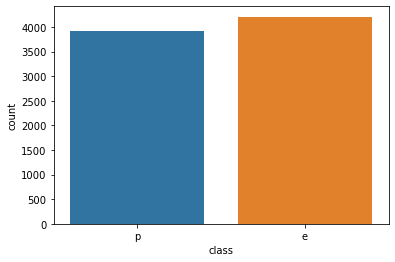

In [6]:
# Visualize the target variable

sns.countplot(x= df['class'], data=df)
plt.show()

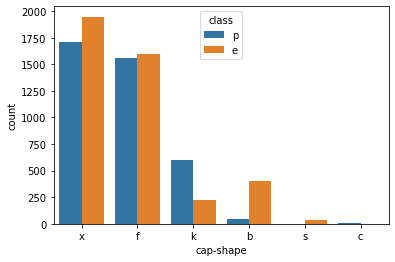

In [7]:
# Let us see the distribution based on the cap shape

f,ax=plt.subplots()
caps = df['cap-shape'].value_counts()
cap_labels = caps.axes[0].tolist() 
sns.countplot(x='cap-shape', hue='class', data=df, order=cap_labels)
plt.show()

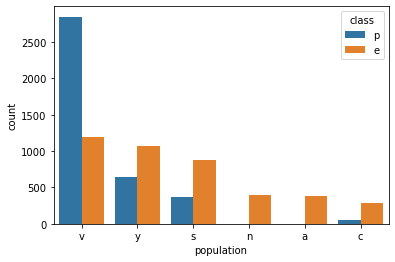

In [8]:
# Let us see the distribution based on the population

f,ax = plt.subplots()
pop = df['population'].value_counts()
pop_labels = pop.axes[0].tolist()
sns.countplot(x='population', hue = 'class',data=df, order=pop_labels)
plt.show()


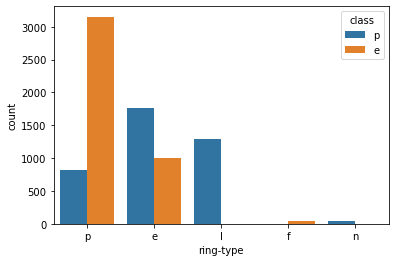

In [9]:
# Let us see the distribution based on the ring type

f,ax = plt.subplots()
ring = df['ring-type'].value_counts().axes[0].tolist()
sns.countplot(x='ring-type', hue='class', data=df,order=ring)
plt.show()


After we visualize our dataset to get a good understanding of our dataset. We get into the conclusion that our target variable is pretty balance, no null values, and no need for cleaning the data. And now we could move to the next step.

## Step 3 : Preprocessing Data

In [12]:
# Since our data only consist of categorical data, we must transform it into numerical data so it can fit into the model

enc = OneHotEncoder()  
le= LabelEncoder()

X = pd.DataFrame(enc.fit_transform(X).toarray())
y = le.fit_transform(y)

sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
# Let us split our data into data train and data test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=22)

Now that our data is ready, let us continue to the next step

## Step 4 : Model Selection (Logistic, RandomForest, and KNN)

In [14]:
#First we will make a function that we will help us through the model

models = ['LogisticRegression','RandomForest','KNearestNeighbors']

scores = [None] * len(models)

def show_results(best_model, prediction,model):
    acc = accuracy_score(y_test, prediction)
    
    scores[models.index(model)] = acc
        
    prec = precision_score(y_test, prediction)
    rec = recall_score(y_test, prediction)
    error = plot_confusion_matrix(best_model, X_test, y_test, normalize='true', cmap="magma")
    error = 1-(sum(np.diag(error.confusion_matrix)) / sum(error.confusion_matrix.ravel()))
    error = ("%.4f" % (error*100))
    print(f'Accuracy:{acc}')
    print(f'Precision:{prec}')
    print(f'Recall:{rec}')
    print(f"Error rate: {error}%")

Accuracy:1.0
Precision:1.0
Recall:1.0
Error rate: 0.0000%


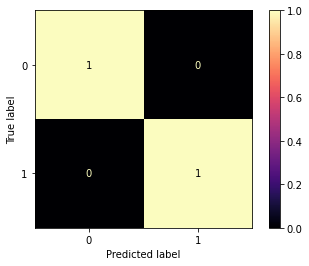

In [15]:
# Let us apply with Logistic Regression 

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

show_results(lr, y_pred,"LogisticRegression")

In [24]:
# We could see the test score is perfect even using default argument, let us check the training score to see if there are some overfitting problem or not

cv = cross_val_score(lr,X_train,y_train,cv=10)
training_score = np.mean(cv)
print("Training Score: %.4f" % training_score)

Training Score: 0.9998


Accuracy:1.0
Precision:1.0
Recall:1.0
Error rate: 0.0000%


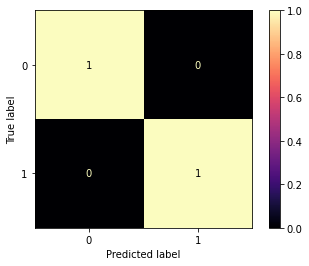

In [25]:
# Let us aplly with Random Forest Classifier

rf = RandomForestClassifier()
rf_params = {
    'n_estimators':[25,40],
    'max_depth': [4,7,9]
}

gridsearch_rf = GridSearchCV(estimator=rf,
                          param_grid = rf_params,
                          cv = 5,
                         )
gridsearch_rf.fit(X_train, y_train)
rf_best_model = gridsearch_rf.best_estimator_
predictions = rf_best_model.predict(X_test)
show_results(rf_best_model,predictions,'RandomForest')

Accuracy:0.9987692307692307
Precision:1.0
Recall:0.9973821989528796
Error rate: 0.1309%


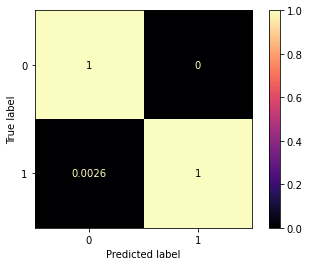

In [26]:
#Let us apply with KNN

knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [4,10],
    'weights': ['uniform','distance']
}

gridsearch_knn = GridSearchCV(knn,
                          param_grid = knn_params,
                          cv = 5,
                         )
gridsearch_knn.fit(X_train, y_train)
knn_best_model = gridsearch_knn.best_estimator_
predictions = knn_best_model.predict(X_test)

show_results(knn_best_model,predictions,'KNearestNeighbors')

In [27]:
# Let us compare the result from our models

compare = pd.DataFrame({'Classifier Models' : models , 'Accuracy' : scores})
compare.sort_values(by='Accuracy' ,ascending=False)

,Classifier Models,Accuracy
0,LogisticRegression,1.000000
1,RandomForest,1.000000
2,KNearestNeighbors,0.998769


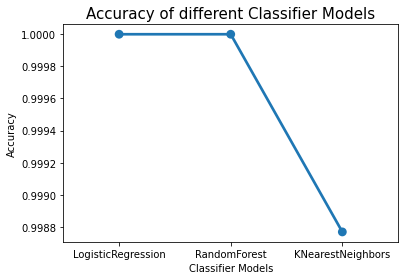

In [28]:
# Let us visualize the compare result

f,ax=plt.subplots()
sns.pointplot(x=models, y=scores)
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title("Accuracy of different Classifier Models", fontsize=15)
plt.show()

## Step 5 : Conclusion

Based the result from our models. We achieved almost perfect accuracy from all models. The reason maybe because some of the attributes are specific for poisonous mushrooms and some of them for edible mushrooms, with these features, models like decisionTrees can be very powerful. Thank you for your attention.